In [93]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, Concatenate
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

import numpy as np

from os import listdir
from os.path import isfile, join

import pandas as pd

from PIL import Image
import cv2

from matplotlib import pyplot as plt

%matplotlib inline


In [20]:
def getActiveNeuron(gender):
    if gender == 'male':
        return np.array([1, 0])
    else:
        return np.array([0, 1])

In [86]:
# Generating dataset:

IMAGES_SIZE = (100,100)
datasetbase_path = './hands_dataset/'
datasetless_path = './lessDataset_bregy/'

datasetInfo = pd.read_csv('./HandInfo.csv')
sampleHands = datasetInfo.sample(frac=0.1)

print "Making little dataset with %i images"%len(sampleHands)

images_names = []
for i in xrange(len(sampleHands)):
    iname = sampleHands.iloc[i]['imageName']
    images_names.append(iname)
    img = Image.open(join(datasetbase_path, iname))
    img = img.resize(IMAGES_SIZE)
    img = img.rotate(angle=180)
    img.save(join(datasetless_path, iname))


Making little dataset with 1108 images


In [87]:
labels_gender = []
labels_binary = []
total_images = []

genderToOut = {'male':0, 'female': 1}
sample_by_name = sampleHands.set_index('imageName')
for s in range(len(sample_by_name)):
    
    namei = images_names[s]
    image = cv2.imread(join(datasetless_path, namei))
    total_images.append(image)
    
    
    gender = sample_by_name.loc[namei, 'gender']
    if not 'str' in str(type(gender)):
        labels_gender.append(gender[0])
        labels_binary.append(getActiveNeuron(gender[0]))
    else:
        labels_gender.append(gender)
        labels_binary.append(getActiveNeuron(gender))

total_images = np.array(total_images)
labels_binary = np.array(labels_binary)

labels_bin_one = []
for g in labels_gender:
    labels_bin_one.append(genderToOut[g])
labels_bin_one = np.array(labels_bin_one)

(array([ 388.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  720.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

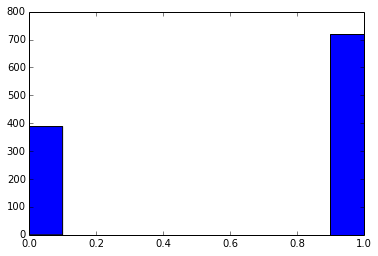

In [88]:
plt.hist(labels_bin_one)

In [89]:
print total_images.shape
print labels_binary.shape
print labels_bin_one.shape

(1108, 100, 100, 3)
(1108, 2)
(1108,)


In [122]:
patterns_extract = Sequential()

patterns_extract.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMAGES_SIZE[0], IMAGES_SIZE[1], 3)))
patterns_extract.add(Conv2D(16, (3, 3), activation='relu'))
patterns_extract.add(MaxPooling2D(pool_size=(2, 2)))
patterns_extract.add(Dropout(0.25))

patterns_extract.add(Conv2D(32, (3, 3), activation='relu'))
patterns_extract.add(Conv2D(32, (3, 3), activation='relu'))
patterns_extract.add(MaxPooling2D(pool_size=(2, 2)))
patterns_extract.add(Dropout(0.25))

patterns_extract.add(Conv2D(64, (3, 3), activation='relu'))
patterns_extract.add(Conv2D(64, (3, 3), activation='relu'))
patterns_extract.add(MaxPooling2D(pool_size=(2, 2)))
patterns_extract.add(Dropout(0.25))

patterns_extract.add(Flatten())

patterns_extract.add(Dense(2000, activation='relu'))
patterns_extract.add(Dropout(0.5))
patterns_extract.add(Dense(1500, activation='relu'))
patterns_extract.add(Dropout(0.5))
patterns_extract.add(Dense(1500, activation='relu'))
patterns_extract.add(Dropout(0.5))
patterns_extract.add(Dense(1000, activation='relu'))
patterns_extract.add(Dropout(0.5))

patterns_extract.add(Dense(1, activation='sigmoid'))

adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

patterns_extract.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [123]:
hist = patterns_extract.fit(total_images, labels_bin_one, epochs=100, batch_size=128)

Epoch 1/100
1108/1108 [==============================] - 45s 41ms/step - loss: 5.5553 - acc: 0.5866
Epoch 2/100
1108/1108 [==============================] - 45s 41ms/step - loss: 3.7067 - acc: 0.5984
Epoch 3/100
1108/1108 [==============================] - 40s 36ms/step - loss: 0.9547 - acc: 0.5487
Epoch 4/100
1108/1108 [==============================] - 41s 37ms/step - loss: 0.7615 - acc: 0.5253
Epoch 5/100
1108/1108 [==============================] - 45s 41ms/step - loss: 0.7101 - acc: 0.5397
Epoch 6/100
1108/1108 [==============================] - 42s 38ms/step - loss: 0.6864 - acc: 0.5776
Epoch 7/100
1108/1108 [==============================] - 40s 36ms/step - loss: 0.6829 - acc: 0.5532
Epoch 8/100
1108/1108 [==============================] - 39s 35ms/step - loss: 0.6868 - acc: 0.5632
Epoch 9/100
1108/1108 [==============================] - 40s 36ms/step - loss: 0.6872 - acc: 0.5758
Epoch 10/100
1108/1108 [==============================] - 42s 38ms/step - loss: 0.6771 - acc: 0.5686

KeyboardInterrupt: 

In [ ]:
patterns_extract.summary()

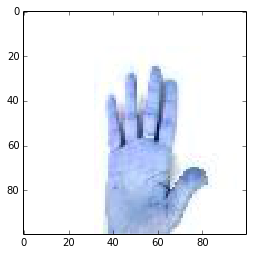

In [105]:
plt.imshow(total_images[30], interpolation='none')

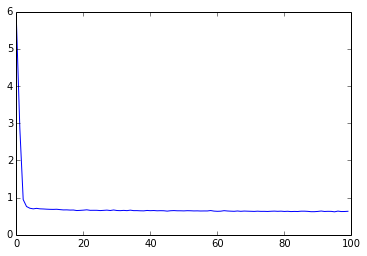

In [107]:
plt.plot(hist.history['loss'])

(array([ 404.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  704.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

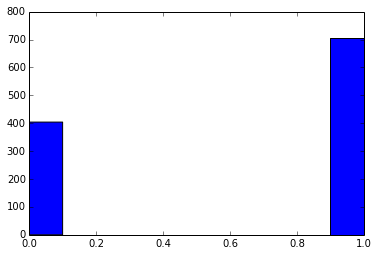

In [86]:
ages= sampleHands.iloc[:]['gender']
agesArr = []
mldict = {'male': 0, 'female':  1}
for i in range(len(ages)):
    agesArr.append(mldict[ages.iloc[i]])
plt.hist(agesArr)

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

In [113]:
sampleHands

,id,age,gender,skinColor,accessories,nailPolish,aspectOfHand,imageName,irregularities
4480,1050,20,female,medium,0,0,palmar right,Hand_0004870.jpg,0
955,1074,21,female,medium,1,0,dorsal left,Hand_0001160.jpg,0
2102,1020,20,female,medium,1,0,dorsal left,Hand_0002421.jpg,0
8537,596,22,female,fair,1,0,palmar right,Hand_0009053.jpg,0
2759,1549,20,female,medium,1,0,palmar left,Hand_0003086.jpg,0
7456,1597,21,female,medium,0,0,dorsal right,Hand_0007921.jpg,0
8373,528,22,female,medium,1,0,palmar right,Hand_0008880.jpg,0
1770,1555,25,male,medium,0,0,dorsal left,Hand_0002069.jpg,0
1394,1519,20,male,medium,1,0,dorsal right,Hand_0001676.jpg,0
319,1073,20,female,medium,1,0,dorsal left,Hand_0000400.jpg,0
